In [1]:
from subprocess import CalledProcessError
from infras.configs import *
from infras.misc import *
from subprocess import CalledProcessError
import subprocess


In [3]:
def run_command(cmd):
    with subprocess.Popen(cmd, stdout=subprocess.PIPE, bufsize=1, universal_newlines=True) as p:
        for line in p.stdout:
            print(line, end='')

    if p.returncode != 0:
        raise CalledProcessError(p.returncode, p.args)

domain = 'Heat'
rank = 5
method = 'dc'
fold = 1
    
data_path = os.path.join('exp_data_dc', domain, 'fold'+str(fold))

res_path = os.path.join(
        '__res_{}__'.format(domain.lower()),
        method.lower(),
        'rank'+str(rank), 
        'fold'+str(fold)
)
create_path(res_path)
print(res_path)
    
data_name = os.path.join(data_path, 'data.mat')
res_name = os.path.join(res_path, 'results.mat')

matlab_cmd = 'train_'+method+'('+str(rank) + ', ' +\
                '\'' + data_name + '\'' ', ' +\
                '\'' + res_name + '\'' + '); quit force;'

command = ["matlab", "-nodesktop", "-r", matlab_cmd]

run_command(command)

__res_heat__/dc/rank5/fold1

                            < M A T L A B (R) >
                  Copyright 1984-2023 The MathWorks, Inc.
              R2023a Update 3 (9.14.0.2286388) 64-bit (maci64)
                                May 25, 2023

 
要开始，请键入 doc。
有关产品信息，请访问 www.mathworks.com。
 
Checking Gradient along random direction:
Max difference between user and numerical directional-derivative: 2.390948e-09
 Iteration   FunEvals     Step Length    Function Val        Opt Cond
         1          2     1.02024e-03     1.14372e+02     5.95076e+02
         2          3     1.00000e+00    -1.22557e+03     5.53733e+02
         3          4     1.00000e+00    -1.69455e+03     1.07787e+02
         4          5     1.00000e+00    -1.75155e+03     6.23081e+01
         5          6     1.00000e+00    -1.77835e+03     3.18995e+01
         6          7     1.00000e+00    -1.78684e+03     3.12725e+01
         7          8     1.00000e+00    -1.80952e+03     1.61860e+01
         8          9     1.

In [1]:
import scipy.io

mat = scipy.io.loadmat('__res_heat__/dc/rank5/fold0/results.mat')

# Get Normalized Root Mean Square Error
nrmse = mat['nrmse']

print("nrmse: ", nrmse)


nrmse:  [[0.21643439]]


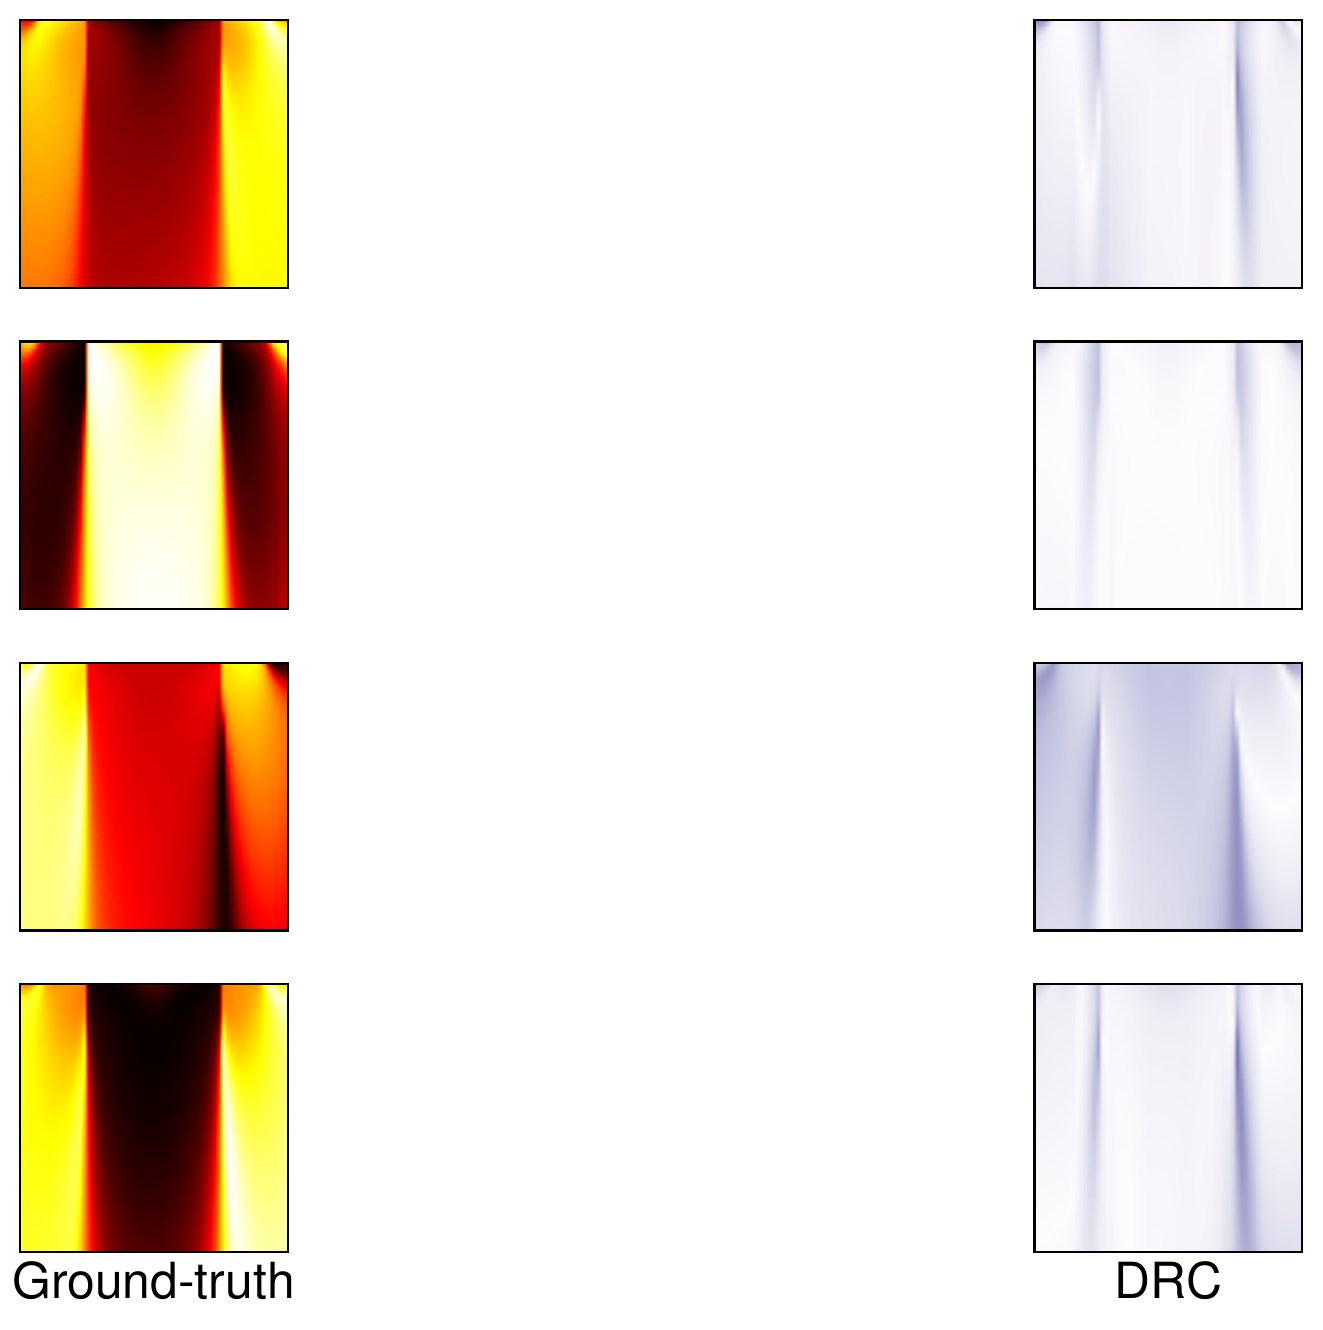

In [1]:
from pdf2image import convert_from_path
from IPython.display import Image, display
pdf_path = "__figs__/errors_Heat_DRC.pdf"

# Convert the PDF to images
images = convert_from_path(pdf_path)

images[0].save("__figs__/errors_Heat_DRC.png", 'PNG')

display(Image(filename='__figs__/errors_Heat_DRC.png'))

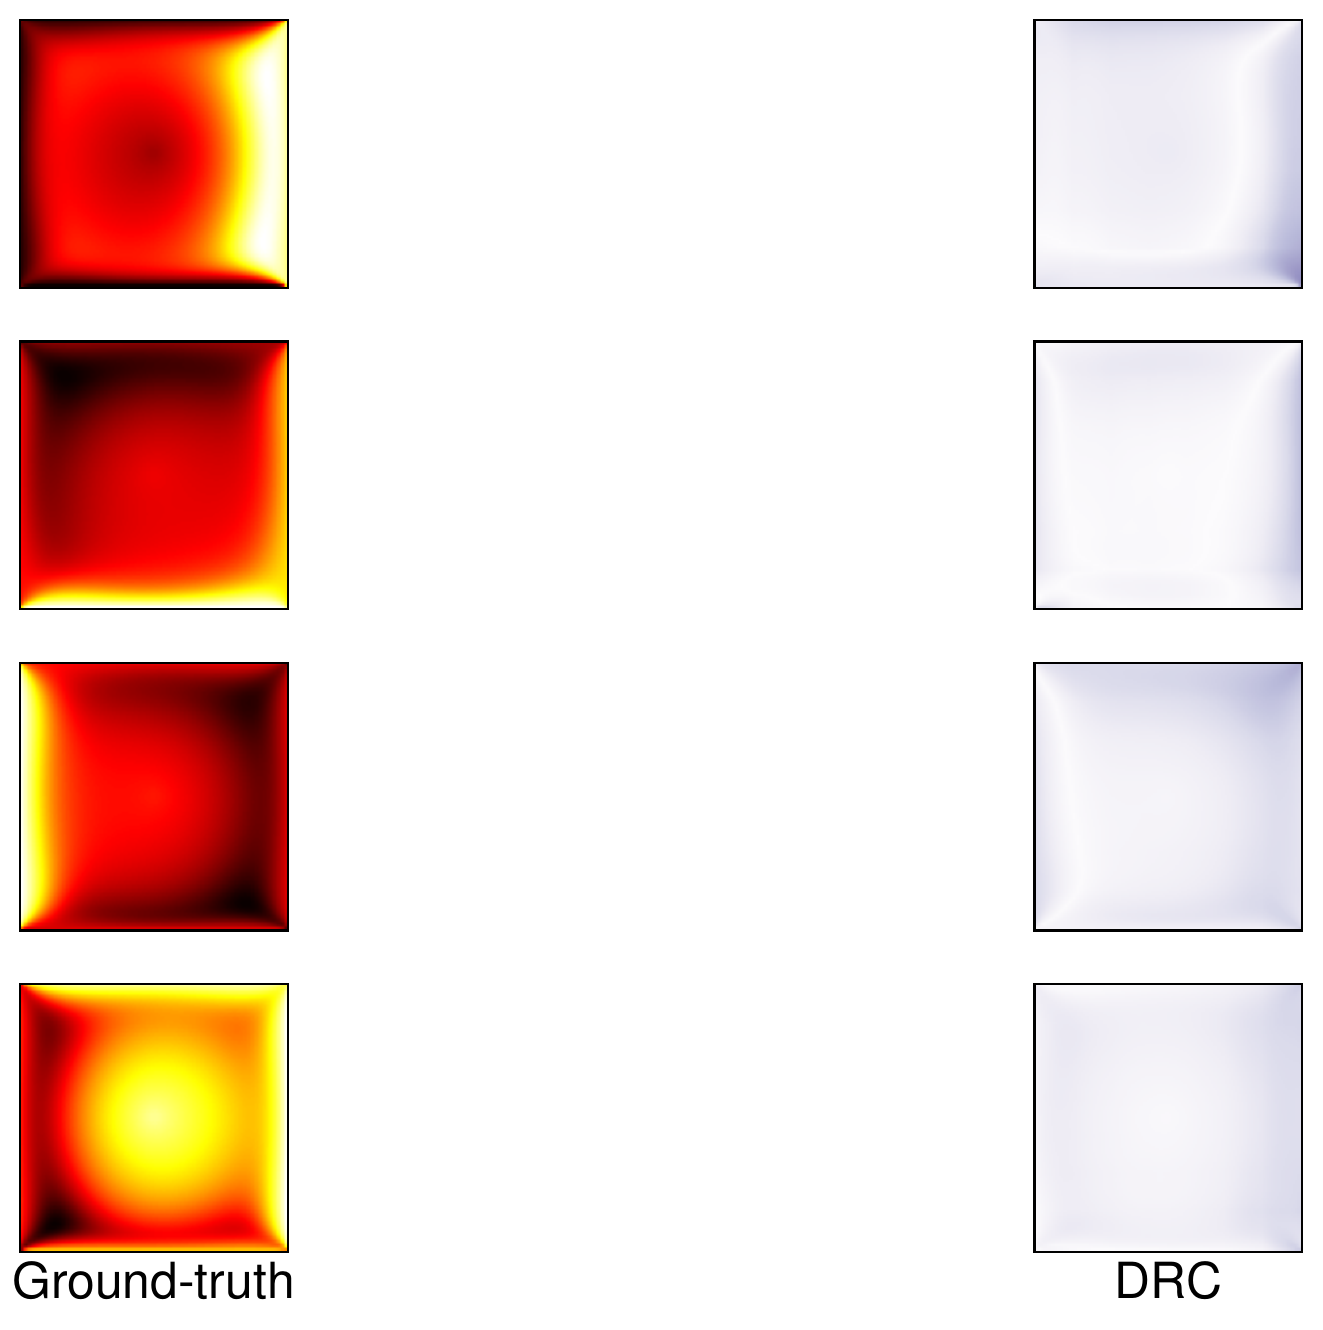

In [2]:
from pdf2image import convert_from_path
from IPython.display import Image, display
pdf_path = "__figs__/errors_Poisson_DRC.pdf"

# Convert the PDF to images
images = convert_from_path(pdf_path)

images[0].save("__figs__/errors_Poisson_DRC.png", 'PNG')

display(Image(filename='__figs__/errors_Poisson_DRC.png'))